In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 150) 

In [2]:
app_rank = pd.read_pickle(r'/Users/justinpassek/Downloads/app_rank_df.pkl')
app_info = pd.read_pickle(r'/Users/justinpassek/Downloads/app_info_df.pkl')

app_rank = app_rank.reset_index().rename(columns={'date': 'app_list_id'})
app_info = app_info.reset_index()

app_info1 = pd.read_pickle(r'/Users/justinpassek/Downloads/app_info_df.pkl')

In [3]:
#Create metrics table and metrics
app_rank_metrics = pd.DataFrame()
app_rank_metrics['days_on_list'] = app_rank.count(axis=1)-2
app_rank_metrics['average_rank_on_list'] = (app_rank.sum(axis=1) / app_rank_metrics['days_on_list']).round(2)
app_rank_metrics['max'] = app_rank.max(axis=1)
app_rank_metrics['min'] = app_rank.min(axis=1)
app_rank_metrics['std'] = app_rank.std(axis=1)

In [4]:
# Create subset to build days in top ranks
sub_ar10 = pd.read_pickle(r'/Users/justinpassek/Downloads/app_rank_df.pkl')
sub_ar3 = pd.read_pickle(r'/Users/justinpassek/Downloads/app_rank_df.pkl')
sub_ar1 = pd.read_pickle(r'/Users/justinpassek/Downloads/app_rank_df.pkl')
sub_ar10['days_in_top_10'] = sub_ar10[sub_ar10 <= 10].count(axis=1)
sub_ar3['days_in_top_3'] = sub_ar3[sub_ar3 <= 3].count(axis=1)
sub_ar1['days_in_top_1'] = sub_ar1[sub_ar1 <= 1].count(axis=1)

#Append to metrics table
sub_ar10 = sub_ar10.reset_index()
sub_ar3 = sub_ar3.reset_index()
sub_ar1 = sub_ar1.reset_index()
app_rank_metrics['days_in_top_10'] = sub_ar10['days_in_top_10']
app_rank_metrics['days_in_top_3'] = sub_ar3['days_in_top_3']
app_rank_metrics['days_in_top_1'] = sub_ar1['days_in_top_1']

In [5]:
#app_rank_metrics as 
app_rank = pd.concat([app_rank, app_rank_metrics], axis=1)

In [6]:
sub_ar = pd.read_pickle(r'/Users/justinpassek/Downloads/app_rank_df.pkl')

indexes = (sub_ar.reset_index())[['itunes_app_id','rating_list']]

In [7]:
#Daily Jumps
#NR-top10
difference_arNR10 = sub_ar.fillna(201).diff(axis=1,periods=1)
difference_arNR10 = difference_arNR10[(difference_arNR10<=-191).any(axis=1)]
difference_arNR10['Daily_NR_Top10'] = 1

#Ranked to Ranked jump of 150
difference_ar150 = sub_ar.diff(axis=1,periods=1)
difference_ar150 = difference_ar150[(difference_ar150<=-150).any(axis=1)]
difference_ar150['Daily_150jump'] = 1

#Weekly Jumps
#NR-top10
difference_ar7NR10 = sub_ar.fillna(201).diff(axis=1,periods=7)
difference_ar7NR10 = difference_ar7NR10[(difference_ar7NR10<=-191).any(axis=1)]
difference_ar7NR10['Weekly_NR_Top10'] = 1

#Ranked to Ranked jump of 150
difference_ar7150 = sub_ar.diff(axis=1,periods=7)
difference_ar7150 = difference_ar7150[(difference_ar7150<=-150).any(axis=1)]
difference_ar7150['Weekly_150jump'] = 1

#Monthly Jumps
#NR-top10
difference_ar30NR10 = sub_ar.fillna(201).diff(axis=1,periods=30)
difference_ar30NR10 = difference_ar30NR10[(difference_ar30NR10<=-191).any(axis=1)]
difference_ar30NR10['Monthly_NR_Top10'] = 1

#Ranked to Ranked jump of 150
difference_ar30150 = sub_ar.diff(axis=1,periods=30)
difference_ar30150 = difference_ar30150[(difference_ar30150<=-150).any(axis=1)]
difference_ar30150['Monthly_150jump'] = 1

In [8]:
#Add growth metrics columns
growth_metrics=pd.merge(indexes,
                        difference_arNR10['Daily_NR_Top10'],
                        how='left',
                        left_on=['itunes_app_id','rating_list'],
                        right_index=True)

growth_metrics=pd.merge(growth_metrics,
                        difference_ar150['Daily_150jump'],
                        how='left',
                        left_on=['itunes_app_id','rating_list'],
                        right_index=True)

growth_metrics=pd.merge(growth_metrics,
                        difference_ar7NR10['Weekly_NR_Top10'],
                        how='left',
                        left_on=['itunes_app_id','rating_list'],
                        right_index=True)

growth_metrics=pd.merge(growth_metrics,
                        difference_ar7150['Weekly_150jump'],
                        how='left',
                        left_on=['itunes_app_id','rating_list'],
                        right_index=True)

growth_metrics=pd.merge(growth_metrics,
                        difference_ar30NR10['Monthly_NR_Top10'],
                        how='left',
                        left_on=['itunes_app_id','rating_list'],
                        right_index=True)

growth_metrics=pd.merge(growth_metrics,
                        difference_ar30150['Monthly_150jump'],
                        how='left',
                        left_on=['itunes_app_id','rating_list'],
                        right_index=True)

growth_metrics.fillna(0,inplace=True)

In [9]:
#Days rising or maintaining in past 7 days
last7 = sub_ar[sub_ar.columns[-7:]]
last7diff = last7.diff(axis=1,periods=1)
last7diff['days_rising_last_7'] = (last7diff<=0).sum(axis=1)

#Days rising or maintaining in past 30 days
last30 = sub_ar[sub_ar.columns[-30:]]
last30diff = last30.diff(axis=1,periods=1)
last30diff['days_rising_last_30'] = (last30diff<=0).sum(axis=1)

#Days rising or maintaining in past 90 days
last90 = sub_ar[sub_ar.columns[-90:]]
last90diff = last90.diff(axis=1,periods=1)
last90diff['days_rising_last_90'] = (last90diff<=0).sum(axis=1)

#Days rising or maintaining in past 180 days
last180 = sub_ar[sub_ar.columns[-180:]]
last180diff = last180.diff(axis=1,periods=1)
last180diff['days_rising_last_180'] = (last180diff<=0).sum(axis=1)

TypeError: can only concatenate str (not "int") to str

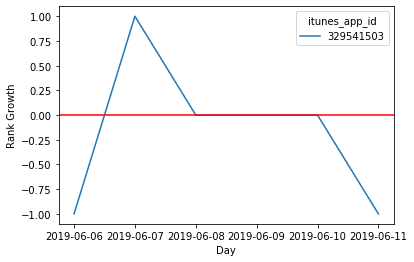

In [10]:
Rt_App = sub_ar[sub_ar.columns[-7:]]
Rt_App = Rt_App.diff(axis=1,periods=1)
Rt_App = Rt_App.groupby(by='itunes_app_id').mean()
Rt_App_Geocaching = Rt_App[Rt_App.index.str.endswith('329541503')]
fig = Rt_App_Geocaching.T.plot()
fig.set_ylabel('Rank Growth')
fig.set_xlabel('Day')
fig.axhline(y=0, color ='r')
y_ticks = np.arange(np.arange(min('Rank Growth'), max('Rank Growth')+1, 1.0))
fig.yticks(y_ticks)

In [11]:
#Join to growth metrics
growth_metrics=pd.merge(growth_metrics,
                        last7diff['days_rising_last_7'],
                        how='left',
                        on=['itunes_app_id','rating_list'])

growth_metrics=pd.merge(growth_metrics,
                        last30diff['days_rising_last_30'],
                        how='left',
                        on=['itunes_app_id','rating_list'])

growth_metrics=pd.merge(growth_metrics,
                        last90diff['days_rising_last_90'],
                        how='left',
                        on=['itunes_app_id','rating_list'])

growth_metrics=pd.merge(growth_metrics,
                        last180diff['days_rising_last_180'],
                        how='left',
                        on=['itunes_app_id','rating_list'])

In [12]:
#Both growth and overall metrics
app_rank_metrics = pd.merge(app_rank[['itunes_app_id',
                                      'rating_list',
                                      'days_on_list',
                                      'average_rank_on_list',
                                      'max',
                                      'min',
                                      'std',
                                      'days_in_top_10',
                                      'days_in_top_3',
                                      'days_in_top_1']],
                            growth_metrics,
                            how='left',
                            on=['itunes_app_id','rating_list']
                           )

In [13]:
#Create days since release metric on app_rank
app_info['release_date'] = pd.to_datetime(app_info['release_date'])
app_info['days_since_release'] = pd.to_numeric(
    (pd.to_datetime(
        '2019-06-11'
    ) - app_info['release_date']
    )/np.timedelta64(1,'D')
)

In [14]:
# Create master app_data df where keys are itunes_app_id and rating_list    
app_data = pd.merge(                                                       
           app_rank_metrics,                                                                                                                  
           app_info[['itunes_app_id',                                                                                                         
                     'app_name',                                                      
                     'developer',             
                     'category',
                     'days_since_release',
                     'is_editor_choice',                    
                     'rating_oo5',                       
                     'num_ratings',                          
                     'has_iap',                           
                     'age_rating',           
                     'file_size',                           
                     'description',                             
                     'os_compatibility',                     
                     'languages',              
                     'price']],          
           how='left',                                                                                                                        
           on='itunes_app_id',                                                                                                                
           validate='many_to_one'                            
          )                          

# Keep only rows where app has a name                       
app_data = app_data[app_data['app_name'].notna()]

# Keep only rows where app has been rated
app_data = app_data[app_data['num_ratings'].notna()]

# # Keep only rows where has app release date
app_data = app_data[app_data['days_since_release'].notna()]

In [15]:
# Find desireable ("TCG_Magic_15") investments                              

TCG_Magic_15_Strings = 'Headspace Inc.|Telepathic, Inc.|Dow Jones & Company, Inc., publisher of The Wall Street Journal.|onXmaps, Inc.|MLB|Ellation, Inc.|Netflix, Inc.|Quizlet Inc|Duolingo|ProdigyGame.com|ESPN|The Action Network, Inc.|Surfline/Wavetrak|The Athletic Media Company|AllTrails, Inc.'                                           
                                                                     
desirable_investments = app_data.loc[app_data['developer'].str.contains(TCG_Magic_15_Strings)]

desirable_investments['desirable_investment'] = 1 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [16]:
#Join desirable investment metric                                           
app_data_master = pd.merge(app_data,                                                                                                               
                           desirable_investments[['itunes_app_id',                                                                                 
                                                  'rating_list',                                                                                   
                                                  'desirable_investment']],                
                           how='left',                       
                           on=['itunes_app_id','rating_list']
                          )                                      
                                                       
#Change NA's to 0's                                        
app_data_master['desirable_investment'] = app_data_master['desirable_investment'].fillna(0)             
                                                   


In [17]:
app_data_master.dtypes

itunes_app_id            object
rating_list              object
days_on_list              int64
average_rank_on_list    float64
max                     float64
min                     float64
std                     float64
days_in_top_10            int64
days_in_top_3             int64
days_in_top_1             int64
Daily_NR_Top10          float64
Daily_150jump           float64
Weekly_NR_Top10         float64
Weekly_150jump          float64
Monthly_NR_Top10        float64
Monthly_150jump         float64
days_rising_last_7        int64
days_rising_last_30       int64
days_rising_last_90       int64
days_rising_last_180      int64
app_name                 object
developer                object
category                 object
days_since_release      float64
is_editor_choice         object
rating_oo5               object
num_ratings              object
has_iap                  object
age_rating               object
file_size                object
description              object
os_compa

In [19]:
# Divide Volume by days_since_release
#app_data_master['days_on_list_RT'] = app_data_master['days_on_list']/app_data_master['days_since_release']
#app_data_master['days_in_top_3_RT'] = app_data_master['days_in_top_3']/app_data_master['days_since_release']
#app_data_master['days_in_top_10_RT'] = app_data_master['days_in_top_10']/app_data_master['days_since_release']
#app_data_master['days_in_top_1_RT'] = app_data_master['days_in_top_1']/app_data_master['days_since_release']
#app_data_master['num_ratings_RT'] = app_data_master['num_ratings']/app_data_master['days_since_release']

In [18]:
#Filtering criteria                                                                                                     
#    10 days ranked on a list |OR| 50 days of rise in the last 6 months
#    Top 20 peak ranking |OR| 15 days of rise in the last 30                                                                                                                                       
app_data_master_filtered = app_data_master.loc[(app_data_master.days_on_list>=100) |
                                               (app_data_master.days_rising_last_180>=50)]

app_data_master_filtered = app_data_master_filtered.loc[(app_data_master_filtered['min']<20) |
                                                        (app_data_master.days_rising_last_30>=15)]


In [19]:
#Scale Continuous Features
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 

scaled_features = app_data_master_filtered.copy()
col_names = ['days_on_list',
             'average_rank_on_list',
             'min',
             'days_in_top_10',
             'days_in_top_3',
             'days_in_top_1',
             'days_rising_last_7',
             'days_rising_last_30',
             'days_rising_last_90',
             'days_rising_last_180',
             'rating_oo5',
             'num_ratings'
            ]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
app_data_master_filtered = scaled_features

In [20]:
# One-hot encode categorical features
# label encoding the data 

#df['zipcode'] = df['zipcode'].astype(object)
#df['latlon_cluster_label'] = df['latlon_cluster_label'].astype(object)
#df['lastSale_above_market'] = df['lastSale_above_market'].astype(object)

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

app_data_master_filtered = encode_and_bind(app_data_master_filtered, 'is_editor_choice')
app_data_master_filtered = encode_and_bind(app_data_master_filtered, 'has_iap')
app_data_master_filtered = encode_and_bind(app_data_master_filtered, 'category')

In [21]:
#Create final dataframe for modeling w/ features only
indexes = app_data_master_filtered[['itunes_app_id','rating_list','app_name','developer']]
modeled_data = app_data_master_filtered.drop(['itunes_app_id','rating_list','max','std','Daily_NR_Top10','Daily_150jump','Weekly_NR_Top10','Weekly_150jump','Monthly_NR_Top10','Monthly_150jump','app_name','developer','age_rating','file_size','description','os_compatibility','languages','price'], axis=1)

In [22]:
# XGBoost

import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb

#Test/Train
from sklearn.model_selection import train_test_split

X = modeled_data.drop('desirable_investment', axis = 1)
y = modeled_data['desirable_investment']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


#Perform grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

#Find the best model from Grid Search
grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [23]:
#grid.best_estimator_'
import sys
#!{sys.executable} -m pip install xgboost
!brew reinstall xgboost
import xgboost as xgb
!conda install -c conda-forge xgboost


==> Downloading https://homebrew.bintray.com/bottles/xgboost-1.1.0.catalina.bott
Already downloaded: /Users/justinpassek/Library/Caches/Homebrew/downloads/47380e0afe3d8d54a8406147b16f7d6413ad79b2fb4387f07867cc2eccfcbd3f--xgboost-1.1.0.catalina.bottle.tar.gz
==> Reinstalling xgboost 
==> Pouring xgboost-1.1.0.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/xgboost/1.1.0: 176 files, 9.5MB
Removing: /Users/justinpassek/Library/Caches/Homebrew/xgboost--1.0.2.catalina.bottle.tar.gz... (2.4MB)
Solving environment: done

# All requested packages already installed.



In [24]:
#Train best model - Optimal tuning
import sys
#!{sys.executable} -m pip install xgboost
!brew install xgboost
!brew install libomp
import xgboost as xgb

#Test/Train
from sklearn.model_selection import train_test_split

X = modeled_data.drop('desirable_investment', axis = 1)
y = modeled_data['desirable_investment']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
austin       cassowary    cloud-nuke   ghz-web      packr        wasm-pack
bombadillo   cddlib       coredns      immudb       unum
==> Updated Formulae
git ✔                                    liblouis
sqlite ✔                                 libmspub
abcmidi                                  libopenmpt
acme                                     libosinfo
acpica                                   libphonenumber
activemq                                 librsvg
aliyun-cli                               libsbol
amazon-ecs-cli                           libtrace
annie                                    libvirt
ant                                      libvisio
aom                                      libwebsockets
arangodb                                 libxlsxwriter
artifactory                              libyaml
ask-cli                                  liquigraph
asyncplusplus                     


To reinstall 1.1.0, run `brew reinstall xgboost`
To reinstall 10.0.0, run `brew reinstall libomp`


In [25]:
!brew install xgboost
!brew install libomp
import xgboost as xgb

Classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, eta=0.05, gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

#Train

Classifier.fit(X_train,Y_train)

#Make predictions

Y_pred_train = Classifier.predict(X_train)
y_pred = Classifier.predict(X_test)

# Pull LogReg prediction probabilities

y_prob = Classifier.predict_proba(X_test)[:,1]

# Compare predictions w/ Table

df = pd.DataFrame({'Actual': Y_test
                  ,'Predicted': y_pred
                  ,'Probability': y_prob #only to be used in the case of LogReg
                  })

df.sort_values(by=['Probability'], ascending=False).head(1)

To reinstall 1.1.0, run `brew reinstall xgboost`
To reinstall 10.0.0, run `brew reinstall libomp`


,Actual,Predicted,Probability
9836,0.0,1.0,0.778935


In [26]:
#Make predictions on unfiltered dataset

#Scaling Cont Features
scaled_features = app_data_master.copy()
col_names = ['days_on_list',
             'average_rank_on_list',
             'min','days_in_top_10',
             'days_in_top_3',
             'days_in_top_1',
             'days_rising_last_7',
             'days_rising_last_30',
             'days_rising_last_90',
             'days_rising_last_180',
             'rating_oo5',
             'num_ratings'
            ]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
app_data_master = scaled_features

# One-hot encode categorical features
# label encoding the data 
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

app_data_master = encode_and_bind(app_data_master, 'is_editor_choice')
app_data_master = encode_and_bind(app_data_master, 'has_iap')
app_data_master = encode_and_bind(app_data_master, 'category')

#Create final dataframe for modeling w/ features only
indexes = app_data_master[['itunes_app_id','rating_list','app_name','developer']]
modeled_data = app_data_master.drop(['itunes_app_id','rating_list','max','std','Daily_NR_Top10','Daily_150jump','Weekly_NR_Top10','Weekly_150jump','Monthly_NR_Top10','Monthly_150jump','app_name','developer','age_rating','file_size','description','os_compatibility','languages','price'], axis=1)

#Split Features (X) from Target (Y)
Y = modeled_data['desirable_investment']
X = modeled_data.drop('desirable_investment', axis=1)


# XGBoost
#import sys
#!{sys.executable} -m pip install xgboost
!brew install xgboost
!brew install libomp
import xgboost as xgb

#Train best model - Optimal tuning
Classifier = xgb.XGBClassifier(base_score=0.5,                #Initial Prediction
                               booster='gbtree',              #Tree-based model
                               colsample_bylevel=1,           #Subsampling. 70% of columns used
                               colsample_bynode=1,            #   per tree. No subsampling, (100%)
                               colsample_bytree=0.7,          #   of columns used by level and node
                               eta=0.05,                      #Step size shrinkage. Low to prevent OFing
                               gamma=0.0,                     #Minimum loss reduction required to
                                                              #make a further partition on a leaf node
                               learning_rate=0.1,             #Learning Rate
                               max_delta_step=0,              #No constraint. Less conservative
                               max_depth=5,                   #Tree depth - complexity. Higher values risk OF 
                               n_estimators=100,              #Number of trees
                               n_jobs=1,                      #Threading, parallel jobs
                               objective='binary:logistic',   #Binary classification
                               random_state=0,                #Specifies a state to get sim results
                               reg_alpha=0,                   #L1 Reg
                               reg_lambda=1,                  #L2 Reg
                               subsample=1,)                  #100% Subsample. Decrease to prevent OF

#Train
Classifier.fit(X,Y)

#Make predictions
y_pred = Classifier.predict(X)

# Pull LogReg prediction probabilities
y_prob = Classifier.predict_proba(X)[:,1]


To reinstall 1.1.0, run `brew reinstall xgboost`
To reinstall 10.0.0, run `brew reinstall libomp`


In [27]:
df = pd.DataFrame({'Actual': Y
                  ,'Predicted': y_pred
                  ,'Probability': y_prob #only to be used in the case of Classifier
                  })

df.sort_values(by=['Probability'], ascending=False).head(1)

,Actual,Predicted,Probability
41376,1.0,1.0,0.953064


In [28]:
#Recreate master app data frame and tie probability scores to it

#Join desirable investment metric                                           
app_data_master = pd.merge(app_data,                                                                                                               
                           desirable_investments[['itunes_app_id',                                                                                 
                                                  'rating_list',                                                                                   
                                                  'desirable_investment']],                
                           how='left',                       
                           on=['itunes_app_id','rating_list']
                          )                                      
                                                       
#Change NA's to 0's                                        
app_data_master['desirable_investment'] = app_data_master['desirable_investment'].fillna(0)    

# Tie Probability scoring
app_data_master = pd.merge(app_data_master,df[['Probability']],left_index=True,right_index=True)
#app_data_master.sort_values(by=['Probability'], ascending=False).head(150)

In [29]:
aggstats = app_data_master.groupby('itunes_app_id').agg({'days_on_list':'mean',
                                                         'average_rank_on_list':'mean',
                                                         'min':'min',
                                                         'days_rising_last_7':'mean',
                                                         'days_rising_last_30':'mean',
                                                         'days_rising_last_90':'mean',
                                                         'days_rising_last_180':'mean',
                                                         'days_in_top_10':'mean',
                                                         'days_in_top_3':'mean',
                                                         'days_in_top_1':'mean',
                                                         'desirable_investment':'max',
                                                         'Probability':'mean'})

app_info_aggstats = pd.merge(app_info,aggstats,how='left',left_on='itunes_app_id',right_index=True)

In [30]:
#Removing $ from a price and changing free with zero
app_info_aggstats.price = app_info_aggstats.price.str.replace('$','')
app_info_aggstats.price = app_info_aggstats.price.str.replace('Free','0')
app_info_aggstats.price = pd.to_numeric(app_info_aggstats.price)

#Bin price column
bins = np.array([-.01,.01,5,10,20,50,100,300,1000000])
app_info_aggstats['price_bucket'] = pd.cut(app_info_aggstats['price'], bins)

#RM NA's
# Keep only rows where app has a name                       
app_info_aggstats = app_info_aggstats[app_info_aggstats['app_name'].notna()]

# Keep only rows where app has been rated
app_info_aggstats = app_info_aggstats[app_info_aggstats['num_ratings'].notna()]

# Keep only with days on list
app_info_aggstats = app_info_aggstats[app_info_aggstats['days_on_list'].notna()]

In [33]:
# Divide Volume by days_since_release
#app_info_aggstats['days_on_list_RT'] = app_info_aggstats['days_on_list']/app_info_aggstats['days_since_release']
#app_info_aggstats['days_in_top_3_RT'] = app_info_aggstats['days_in_top_3']/app_info_aggstats['days_since_release']
#app_info_aggstats['days_in_top_10_RT'] = app_info_aggstats['days_in_top_10']/app_info_aggstats['days_since_release']
#app_info_aggstats['days_in_top_1_RT'] = app_info_aggstats['days_in_top_1']/app_info_aggstats['days_since_release']
#app_info_aggstats['num_ratings_RT'] = app_info_aggstats['num_ratings']/app_info_aggstats['days_since_release']

In [31]:
# Run another model on 'aggstats'
#Make predictions on agg dataset
app_info_aggstats1 = app_info_aggstats.reset_index()

#Scaling Cont Features
scaled_features = app_info_aggstats1.copy()
col_names = ['days_on_list',
             'average_rank_on_list',
             'min',
             'days_in_top_10',
             'days_in_top_3',
             'days_in_top_1',
             'days_rising_last_7',
             'days_rising_last_30',
             'days_rising_last_90',
             'days_rising_last_180',
             'rating_oo5',
             'num_ratings'
            ]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
app_info_aggstats1 = scaled_features

# One-hot encode categorical features
# label encoding the data 
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

app_info_aggstats1 = encode_and_bind(app_info_aggstats1, 'is_editor_choice')
app_info_aggstats1 = encode_and_bind(app_info_aggstats1, 'has_iap')
app_info_aggstats1 = encode_and_bind(app_info_aggstats1, 'category')
app_info_aggstats1 = encode_and_bind(app_info_aggstats1, 'price_bucket')

#Create final dataframe for modeling w/ features only
indexes = app_info_aggstats1[['itunes_app_id','app_name','developer']]
modeled_data = app_info_aggstats1.drop(['itunes_app_id','app_name','developer','age_rating','file_size','description','os_compatibility','languages','price','Probability','website','release_date','current_version','editor_notes','itunes_link','date'],axis=1)
modeled_data.rename(columns={'price_bucket_(-0.01, 0.01]':'price_free',
                             'price_bucket_(0.01, 5.0]':'price_under5',
                             'price_bucket_(5.0, 10.0]':'price_5to10',
                             'price_bucket_(10.0, 20.0]':'price_10to20',
                             'price_bucket_(20.0, 50.0]':'price_20to50',
                             'price_bucket_(50.0, 100.0]':'price_50to1000',
                             'price_bucket_(100.0, 300.0]':'price_100to300',
                             'price_bucket_(300.0, 1000000.0]':'price_above300'}, inplace=True)

#Split Features (X) from Target (Y)
Y = modeled_data['desirable_investment']
X = modeled_data.drop('desirable_investment', axis=1)


# XGBoost
#import sys
#!{sys.executable} -m pip install xgboost
!brew install xgboost
!brew install libomp
import xgboost as xgb

#Train best model - Optimal tuning
Classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, eta=0.05, gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

#Train
Classifier.fit(X,Y)

#Make predictions
y_pred = Classifier.predict(X)

# Pull LogReg prediction probabilities
y_prob = Classifier.predict_proba(X)[:,1]

To reinstall 1.1.0, run `brew reinstall xgboost`
To reinstall 10.0.0, run `brew reinstall libomp`


In [32]:
app_info_aggstats[['days_on_list',
             'average_rank_on_list',
             'min',
             'days_in_top_10',
             'days_in_top_3',
             'days_in_top_1',
             'days_rising_last_7',
             'days_rising_last_30',
             'days_rising_last_90',
             'days_rising_last_180',
             'rating_oo5',
             'num_ratings',
                    'is_editor_choice',
                    'has_iap',
                    'category',
                    'price'
            ]].dtypes

days_on_list            float64
average_rank_on_list    float64
min                     float64
days_in_top_10          float64
days_in_top_3           float64
days_in_top_1           float64
days_rising_last_7      float64
days_rising_last_30     float64
days_rising_last_90     float64
days_rising_last_180    float64
rating_oo5               object
num_ratings              object
is_editor_choice         object
has_iap                  object
category                 object
price                   float64
dtype: object

In [33]:
# Tie Probability scoring
df = pd.DataFrame({'Actual': Y
                  ,'Predicted': y_pred
                  ,'probability': y_prob #only to be used in the case of Classifier
                  })

app_info_aggstats = pd.merge(app_info_aggstats,(pd.merge(indexes[['itunes_app_id']],df[['probability']],left_index=True,right_index=True)),on='itunes_app_id')
app_info_aggstats = app_info_aggstats.drop('price_bucket', axis=1)

In [34]:
#Normalized non-desireable investment probabilities

TCG_Magic_15_Strings = 'Headspace Inc.|Telepathic, Inc.|Dow Jones & Company, Inc., publisher of The Wall Street Journal.|onXmaps, Inc.|MLB|Ellation, Inc.|Netflix, Inc.|Quizlet Inc|Duolingo|ProdigyGame.com|ESPN|The Action Network, Inc.|Surfline/Wavetrak|The Athletic Media Company|AllTrails, Inc.'                                           
                                                                     
app_info_aggstats_nodesire = app_info_aggstats.loc[~app_info_aggstats['developer'].str.contains(TCG_Magic_15_Strings)]

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['probability'].max()
        min_value = df['probability'].min()
        result['probability_norm'] = (df['probability'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats = pd.merge(app_info_aggstats,
                             normalize(app_info_aggstats_nodesire)[['itunes_app_id',
                                                                    'probability_norm']],
                             on='itunes_app_id')


In [35]:
app_info_aggstats

,itunes_app_id,app_name,developer,website,category,is_editor_choice,rating_oo5,num_ratings,has_iap,release_date,current_version,age_rating,file_size,editor_notes,description,os_compatibility,languages,price,itunes_link,date,days_since_release,days_on_list,average_rank_on_list,min,days_rising_last_7,days_rising_last_30,days_rising_last_90,days_rising_last_180,days_in_top_10,days_in_top_3,days_in_top_1,desirable_investment,Probability,probability,probability_norm
0,573984719,Advent Calendar: 25 Christmas Apps,MagicSolver,http://www.magicsolver.com/,Lifestyle,False,3.9,145,False,2015-11-24,1.1,Rated 4+,61.3 MB,NaN,\nDescription\n\n\nDiscover 25 of the finest f...,Requires iOS 7.0 or later. Compatible with iPh...,"English, Arabic, Dutch, French, German, Italia...",0.0,https://itunes.apple.com/app/id573984719,2019-06-11-1512,1295.0,18.000000,119.500000,83.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000092,0.000085,0.000274
1,424216726,Countdown‼,"Sevenlogics, Inc.",http://www.sevenlogics.com/mobile-apps/countdo...,Lifestyle,False,3.8,5500,True,2019-06-07,4.3.7,Rated 4+,152.7 MB,NaN,\nDescription\n\n\nCount down to your next eve...,Requires iOS 9.0 or later. Compatible with iPh...,"English, Danish, Dutch, Finnish, French, Germa...",0.0,https://itunes.apple.com/app/id424216726,2019-06-11-1512,4.0,320.750000,91.227500,3.0,1.500000,6.500000,16.500000,38.5,49.25,2.5,0.0,0.0,0.003953,0.000781,0.004587
2,983764757,ShowOne - Pro Backing Tracks,One Zero One Audio,http://www.showoneapp.com,Music,False,4.4,41,True,2019-01-03,1.3.11,Rated 4+,63.7 MB,NaN,\nDescription\n\n\nShowOne is a pro app for mu...,Requires iOS 9.3 or later. Compatible with iPh...,English,0.0,https://itunes.apple.com/app/id983764757,2019-06-11-1512,159.0,18.000000,172.170000,123.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000069,0.000067,0.000165
3,422370120,iPoll,"Instantly, Inc.",http://www.ipoll.com,Lifestyle,False,3.7,2100,False,2019-04-22,3.16.1,You must be at least 17 years old to download ...,80.6 MB,NaN,"\nDescription\n\n\nRewards. Anywhere, Anytime....",Requires iOS 10.0 or later. Compatible with iP...,English,0.0,https://itunes.apple.com/app/id422370120,2019-06-11-1512,50.0,141.000000,176.790000,95.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000799,0.000758,0.004443
4,443052658,Surveys On The Go,"MFour Mobile Research, Inc",http://www.surveysonthego.net,Lifestyle,False,4.6,23100,False,2019-05-08,2.37,Rated 12+ for the following:,85.1 MB,NaN,"\nDescription\n\n\nFortune 500 companies, the ...",Requires iOS 10.0 or later. Compatible with iP...,English,0.0,https://itunes.apple.com/app/id443052658,2019-06-11-1512,34.0,276.333333,137.456667,34.0,1.666667,6.666667,17.666667,32.0,0.00,0.0,0.0,0.0,0.001010,0.000753,0.004414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,509885060,唱吧-手机里的KTV,Beijing Kuzhi Tech ltd,http://changba.com,Entertainment,False,4.9,1200,True,2019-05-26,9.0.4,Rated 12+ for the following:,299.1 MB,NaN,\nDescription\n\n\n年轻时尚有品位的K歌社区，和3亿歌友一起嗨唱，达人可以...,Requires iOS 8.0 or later. Compatible with iPh...,"English, Simplified Chinese",0.0,https://itunes.apple.com/app/id509885060,2019-06-11-1512,16.0,4.000000,154.000000,154.0,0.000000,1.000000,1.000000,1.0,0.00,0.0,0.0,0.0,0.000531,0.000272,0.001435
58177,1091375358,Chest Tracker for Clash Royale - Easy Rotation...,TouchMint,http://touchmint.com,Reference,False,4.1,689,False,2016-05-04,1.4,Rated 4+,7.2 MB,NaN,\nDescription\n\n\n►The Ultimate Chest Trackin...,Requires iOS 7.0 or later. Compatible with iPh...,English,0.0,https://itunes.apple.com/app/id1091375358,2019-06-11-1512,1133.0,72.000000,68.920000,37.0,1.000000,1.000000,1.000000,1.0,0.00,0.0,0.0,0.0,0.001216,0.001757,0.010636
58178,792049888,القرآن العظيم | Great Quran,Arabia For Information Technology,http://www.arabia-it.com,Reference,False,4.7,1400,False,2019-05-31,5.4.1,Rated 4+,233.8 MB,NaN,\nDescription\n\n\nتطبيق القرآن 

In [36]:
#Create Scoring Model

app_info_aggstats_norm = app_info_aggstats.copy()

#1a. Rating: oo5 = 10pt
app_info_aggstats_norm['rating_oo5'] = pd.to_numeric(app_info_aggstats_norm['rating_oo5'])*2

#1bi. Rating: num = 5pt
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['num_ratings'].max()
        min_value = df['num_ratings'].min()
        result['num_ratings'] = (df['num_ratings'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['num_ratings'] = pd.to_numeric(app_info_aggstats_norm['num_ratings'])
app_info_aggstats_norm['num_ratings'] = normalize(app_info_aggstats_norm)['num_ratings']*10

#1bii. Rating: num/days released = 5pt
#DEPRECATED

app_info_aggstats_norm['num_ratings_RT'] = app_info_aggstats_norm['num_ratings']/app_info_aggstats_norm['days_since_release']

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['num_ratings_RT'].max()
        min_value = df['num_ratings_RT'].min()
        result['num_ratings_RT'] = (df['num_ratings_RT'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['num_ratings_RT'] = pd.to_numeric(app_info_aggstats_norm['num_ratings_RT'])
app_info_aggstats_norm['num_ratings_RT'] = normalize(app_info_aggstats_norm)['num_ratings_RT']*0


#2a. Charts: High = 5pt

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['min'].max()
        min_value = df['min'].min()
        result['min'] = (df['min'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['min'] = pd.to_numeric(app_info_aggstats_norm['min'])
app_info_aggstats_norm['min'] = abs(normalize(app_info_aggstats_norm)['min']-1)*5

#2bi. Charts: Days on list = 3

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_on_list'].max()
        min_value = df['days_on_list'].min()
        result['days_on_list'] = (df['days_on_list'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_on_list'] = pd.to_numeric(app_info_aggstats_norm['days_on_list'])
app_info_aggstats_norm['days_on_list'] = normalize(app_info_aggstats_norm)['days_on_list']*3

#2bii. Charts: Days on list / days released
#DEPRECATED

app_info_aggstats_norm['days_on_list_RT'] = app_info_aggstats_norm['days_on_list']/app_info_aggstats_norm['days_since_release']

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_on_list_RT'].max()
        min_value = df['days_on_list_RT'].min()
        result['days_on_list_RT'] = (df['days_on_list_RT'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_on_list_RT'] = pd.to_numeric(app_info_aggstats_norm['days_on_list_RT'])
app_info_aggstats_norm['days_on_list_RT'] = normalize(app_info_aggstats_norm)['days_on_list_RT']*0

#2c. Charts: Average Rank = 2pt

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['average_rank_on_list'].max()
        min_value = df['average_rank_on_list'].min()
        result['average_rank_on_list'] = (df['average_rank_on_list'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['average_rank_on_list'] = pd.to_numeric(app_info_aggstats_norm['average_rank_on_list'])
app_info_aggstats_norm['average_rank_on_list'] = abs(normalize(app_info_aggstats_norm)['average_rank_on_list']-1)*2

#3a. Recent Growth: 7 day = 5.5pt

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_rising_last_7'].max()
        min_value = df['days_rising_last_7'].min()
        result['days_rising_last_7'] = (df['days_rising_last_7'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_rising_last_7'] = pd.to_numeric(app_info_aggstats_norm['days_rising_last_7'])
app_info_aggstats_norm['days_rising_last_7'] = normalize(app_info_aggstats_norm)['days_rising_last_7']*5.5

#3b. Recent Growth: 30 day = 4.5pt

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_rising_last_30'].max()
        min_value = df['days_rising_last_30'].min()
        result['days_rising_last_30'] = (df['days_rising_last_30'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_rising_last_30'] = pd.to_numeric(app_info_aggstats_norm['days_rising_last_30'])
app_info_aggstats_norm['days_rising_last_30'] = normalize(app_info_aggstats_norm)['days_rising_last_30']*4.5

#3c. Recent Growth: 90 day = 3pt


def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_rising_last_90'].max()
        min_value = df['days_rising_last_90'].min()
        result['days_rising_last_90'] = (df['days_rising_last_90'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_rising_last_90'] = pd.to_numeric(app_info_aggstats_norm['days_rising_last_90'])
app_info_aggstats_norm['days_rising_last_90'] = normalize(app_info_aggstats_norm)['days_rising_last_90']*3

#3d. Recent Growth: 180 day = 2pt

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_rising_last_180'].max()
        min_value = df['days_rising_last_180'].min()
        result['days_rising_last_180'] = (df['days_rising_last_180'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_rising_last_180'] = pd.to_numeric(app_info_aggstats_norm['days_rising_last_180'])
app_info_aggstats_norm['days_rising_last_180'] = normalize(app_info_aggstats_norm)['days_rising_last_180']*2

#4ai. Top 10 = 4pt

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_in_top_10'].max()
        min_value = df['days_in_top_10'].min()
        result['days_in_top_10'] = (df['days_in_top_10'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_in_top_10'] = pd.to_numeric(app_info_aggstats_norm['days_in_top_10'])
app_info_aggstats_norm['days_in_top_10'] = normalize(app_info_aggstats_norm)['days_in_top_10']*4

#4aii. Top 10 / days released
#DEPRECATED

app_info_aggstats_norm['days_in_top_10_RT'] = app_info_aggstats_norm['days_in_top_10']/app_info_aggstats_norm['days_since_release']

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_in_top_10_RT'].max()
        min_value = df['days_in_top_10_RT'].min()
        result['days_in_top_10_RT'] = (df['days_in_top_10_RT'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_in_top_10_RT'] = pd.to_numeric(app_info_aggstats_norm['days_in_top_10_RT'])
app_info_aggstats_norm['days_in_top_10_RT'] = normalize(app_info_aggstats_norm)['days_in_top_10_RT']*0

#4bi. Top 3 = 5pt

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_in_top_3'].max()
        min_value = df['days_in_top_3'].min()
        result['days_in_top_3'] = (df['days_in_top_3'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_in_top_3'] = pd.to_numeric(app_info_aggstats_norm['days_in_top_3'])
app_info_aggstats_norm['days_in_top_3'] = normalize(app_info_aggstats_norm)['days_in_top_3']*5

#4bii. Top 3 / days released
#DEPRECATED

app_info_aggstats_norm['days_in_top_3_RT'] = app_info_aggstats_norm['days_in_top_3']/app_info_aggstats_norm['days_since_release']

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_in_top_3_RT'].max()
        min_value = df['days_in_top_3_RT'].min()
        result['days_in_top_3_RT'] = (df['days_in_top_3_RT'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_in_top_3_RT'] = pd.to_numeric(app_info_aggstats_norm['days_in_top_3_RT'])
app_info_aggstats_norm['days_in_top_3_RT'] = normalize(app_info_aggstats_norm)['days_in_top_3_RT']*0


#4ci. Top 1 = 6pt

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_in_top_1'].max()
        min_value = df['days_in_top_1'].min()
        result['days_in_top_1'] = (df['days_in_top_1'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_in_top_1'] = pd.to_numeric(app_info_aggstats_norm['days_in_top_1'])
app_info_aggstats_norm['days_in_top_1'] = normalize(app_info_aggstats_norm)['days_in_top_1']*6


#4cii. Top 1 / days released
#DEPRECATED

app_info_aggstats_norm['days_in_top_1_RT'] = app_info_aggstats_norm['days_in_top_1']/app_info_aggstats_norm['days_since_release']

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df['days_in_top_1_RT'].max()
        min_value = df['days_in_top_1_RT'].min()
        result['days_in_top_1_RT'] = (df['days_in_top_1_RT'] - min_value) / (max_value - min_value)
    return result

app_info_aggstats_norm['days_in_top_1_RT'] = pd.to_numeric(app_info_aggstats_norm['days_in_top_1_RT'])
app_info_aggstats_norm['days_in_top_1_RT'] = normalize(app_info_aggstats_norm)['days_in_top_1_RT']*0

#5. 'probability_norm' = 40pt

app_info_aggstats_norm['probability_norm'] = app_info_aggstats_norm['probability_norm']*40

#Sum scoring model components
app_info_aggstats_norm['score'] = app_info_aggstats_norm['rating_oo5']+app_info_aggstats_norm['num_ratings']+app_info_aggstats_norm['num_ratings_RT']+app_info_aggstats_norm['min']+app_info_aggstats_norm['days_on_list']+app_info_aggstats_norm['days_on_list_RT']+app_info_aggstats_norm['average_rank_on_list']+app_info_aggstats_norm['days_rising_last_7']+app_info_aggstats_norm['days_rising_last_30']+app_info_aggstats_norm['days_rising_last_90']+app_info_aggstats_norm['days_rising_last_180']+app_info_aggstats_norm['days_in_top_10']+app_info_aggstats_norm['days_in_top_10_RT']+app_info_aggstats_norm['days_in_top_3']+app_info_aggstats_norm['days_in_top_3_RT']+app_info_aggstats_norm['days_in_top_1']+app_info_aggstats_norm['days_in_top_1_RT']+app_info_aggstats_norm['probability_norm']

app_info_aggstats_norm['sub_score_ratings_oo20'] = app_info_aggstats_norm['rating_oo5']+app_info_aggstats_norm['num_ratings']+app_info_aggstats_norm['num_ratings_RT']

app_info_aggstats_norm['sub_score_listplacement_oo10'] = app_info_aggstats_norm['min']+app_info_aggstats_norm['days_on_list']+app_info_aggstats_norm['days_on_list_RT']+app_info_aggstats_norm['average_rank_on_list']

app_info_aggstats_norm['sub_score_growth_oo15'] = app_info_aggstats_norm['days_rising_last_7']+app_info_aggstats_norm['days_rising_last_30']+app_info_aggstats_norm['days_rising_last_90']+app_info_aggstats_norm['days_rising_last_180']

app_info_aggstats_norm['sub_score_topranks_oo15'] = app_info_aggstats_norm['days_in_top_10']+app_info_aggstats_norm['days_in_top_10_RT']+app_info_aggstats_norm['days_in_top_3']+app_info_aggstats_norm['days_in_top_3_RT']+app_info_aggstats_norm['days_in_top_1']+app_info_aggstats_norm['days_in_top_1_RT']


In [37]:
app_info_aggstats_norm.sort_values(by=['score'], ascending=False).head(150)

,itunes_app_id,app_name,developer,website,category,is_editor_choice,rating_oo5,num_ratings,has_iap,release_date,current_version,age_rating,file_size,editor_notes,description,os_compatibility,languages,price,itunes_link,date,days_since_release,days_on_list,average_rank_on_list,min,days_rising_last_7,days_rising_last_30,days_rising_last_90,days_rising_last_180,days_in_top_10,days_in_top_3,days_in_top_1,desirable_investment,Probability,probability,probability_norm,num_ratings_RT,days_on_list_RT,days_in_top_10_RT,days_in_top_3_RT,days_in_top_1_RT,score,sub_score_ratings_oo20,sub_score_listplacement_oo10,sub_score_growth_oo15,sub_score_topranks_oo15
5519,318906314,GameChanger Baseball Softball,"GameChanger Media, Inc.",https://gc.com/,Sports,False,9.6,3.346543e-01,True,2019-06-03,10.1,Rated 4+,110.5 MB,NaN,\nDescription\n\n\nGameChanger provides simple...,Requires iOS 11.0 or later. Compatible with iP...,English,0.00,https://itunes.apple.com/app/id318906314,2019-06-11-1512,8.0,1.301020,1.446090,4.974874,2.750000,2.500000,1.536145,0.868263,1.183857,0.542022,0.000000,0.0,0.126451,0.161468,40.000000,0.0,0.0,0.0,0.0,0.0,67.036926,9.934654,7.721985,7.654408,1.725878
558,544007664,"YouTube: Watch, Listen, Stream",Google LLC,https://www.youtube.com,Photo & Video,False,9.4,6.293103e+00,True,2019-06-04,14.22,You must be at least 17 years old to download ...,263.4 MB,NaN,\nDescription\n\n\nMake watching your favorite...,Requires iOS 10.0 or later. Compatible with iP...,"English, Afrikaans, Albanian, Amharic, Arabic,...",0.00,https://itunes.apple.com/app/id544007664,2019-06-11-1512,7.0,0.814226,1.941194,5.000000,1.604167,1.319444,0.864458,0.563872,1.314400,1.823995,1.776699,0.0,0.005064,0.137212,33.989826,0.0,0.0,0.0,0.0,0.0,66.705384,15.693103,7.755419,4.351941,4.915094
32259,477967747,Fishbrain - Fishing App,FishBrain,http://www.fishbrain.com,Sports,False,9.4,6.033621e-03,True,2019-06-03,6.46.1,Rated 4+,176.9 MB,NaN,\nDescription\n\n\nFishbrain is the No. 1 app ...,Requires iOS 11.2 or later. Compatible with iP...,"English, French, Japanese, Portuguese, Spanish...",0.00,https://itunes.apple.com/app/id477967747,2019-06-11-1512,8.0,1.417767,1.892001,5.000000,3.361111,2.277778,1.445783,0.910180,1.478824,0.170524,0.038835,0.0,0.050151,0.157192,38.940456,0.0,0.0,0.0,0.0,0.0,66.339293,9.406034,8.309768,7.994852,1.688183
3552,329541503,Geocaching®,Groundspeak Inc.,http://www.geocaching.com,Navigation,False,9.4,1.017155e-02,True,2019-06-05,7.13.0,Rated 4+,123.4 MB,NaN,\nDescription\n\n\nJoin the world’s largest tr...,Requires iOS 10.0 or later. Compatible with iP...,"English, Bulgarian, Catalan, Croatian, Czech, ...",0.00,https://itunes.apple.com/app/id329541503,2019-06-11-1512,6.0,2.960384,1.953948,5.000000,5.041667,3.500000,2.277108,1.491018,4.000000,4.939099,0.262136,0.0,0.050334,0.072025,17.836935,0.0,0.0,0.0,0.0,0.0,58.672466,9.410172,9.914332,12.309793,9.201235
268,341232718,MyFitnessPal,MyFitnessPal.com,http://www.myfitnesspal.com/,Health & Fitness,False,9.4,5.332750e-01,True,2019-06-08,19.6.1,Rated 4+,187.5 MB,NaN,\nDescription\n\n\nWhether you want to lose we...,Requires iOS 11.0 or later. Compatible with iP...,"English, Danish, Dutch, Filipino, French, Germ...",0.00,https://itunes.apple.com/app/id341232718,2019-06-11-1512,3.0,2.169868,1.484176,5.000000,2.291667,1.958333,1.545181,1.119760,1.944694,2.874543,0.820388,0.0,0.010993,0.099642,24.680365,0.0,0.0,0.0,0.0,0.0,55.822250,9.933275,8.654044,6.914941,5.639625
706,294934058,HotSchedules,HotSchedules,http://www.hotschedules.com,Business,False,9.4,5.655087e-02,False,2019-06-07,4.109.0,Rated 4+,99 MB,NaN,\nDescription\n\n\nHotSchedules is the industr...,Requires iOS 10.0 or later. Compatible with iP...,"English, Spanish",2.99,https://itunes.apple.com/app/id294934058,2019-06-11-1512,4.0,2.222089,1.677508,5.000000,1.833333,2.208333,1.626506,1.101796,3.014948,2.661389,3.922330,0.0,0.006185,0.074860,18.539425,0.0,0.0,0.0,0.0,0.0,53.264208,9.456551,8.899597,6.769969,9.598666
665,576588894,Sky Gui

In [38]:
#df['Rank'] = df['Average'].rank(method='dense', ascending=False)
app_info_aggstats_norm['rank'] = app_info_aggstats_norm['score'].rank(ascending=False)

In [39]:
app_info_aggstats_norm[['app_name','score','rank']].sort_values(by=['score'], ascending=False).head(150)

,app_name,score,rank
5519,GameChanger Baseball Softball,67.036926,1.0
558,"YouTube: Watch, Listen, Stream",66.705384,2.0
32259,Fishbrain - Fishing App,66.339293,3.0
3552,Geocaching®,58.672466,4.0
268,MyFitnessPal,55.822250,5.0
706,HotSchedules,53.264208,6.0
665,Sky Guide,51.570774,7.0
31884,The New York Times,50.113359,8.0
188,Bumble - Meet New People,48.857110,9.0
3859,Washington Post,48.736869,10.0


In [40]:
#Send to CSV
app_info_aggstats_norm.drop(['itunes_link','description','editor_notes'],axis=1).to_csv(r'/Users/justinpassek/Downloads/app_scoring.csv',index= False, header=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1589957d0>]],
      dtype=object)

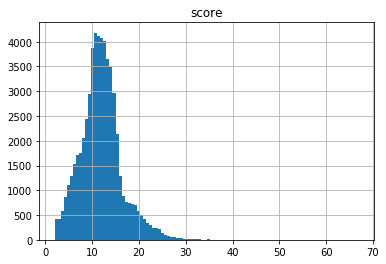

In [41]:
app_info_aggstats_norm[['score']].hist(bins=100)

In [44]:
app_info_aggstats_norm[['score']].describe(percentiles=[.25, .5, .75, .80, .85, .9, .95, .99])

,score
count,58181.000000
mean,11.963398
std,4.521781
min,2.000526
25%,9.252978
50%,11.729851
75%,14.188193
80%,14.789855
85%,15.606700
90%,17.477630


In [45]:
app_scoring = app_info_aggstats_norm

app_scoring = pd.merge(app_info_aggstats,app_scoring[['itunes_app_id','probability_norm','score','sub_score_ratings_oo20','sub_score_listplacement_oo10','sub_score_growth_oo15','sub_score_topranks_oo15']],on='itunes_app_id')

app_scoring_top_perc = app_scoring[app_scoring['score'] > app_scoring['score'].quantile(.99)]

top_scoring_dev = app_scoring_top_perc.groupby('developer').agg({'score': ['count', 'mean','sum']})

#df_new = df.rename(columns={'A': 'a'}, index={'ONE': 'one'})
top_scoring_dev = top_scoring_dev.rename(columns={'count':'Apps',
                                                 'mean':'Avg_Score'})

top_scoring_dev.sort_values(by=[('score', 'Apps'),('score','Avg_Score')], ascending=False).head(50)

score                       
                                          Apps  Avg_Score         sum
developer                                                            
Google LLC                                   5  34.252746  171.263732
Apalon Apps                                  5  31.690107  158.450537
Microsoft Corporation                        4  30.221993  120.887971
MagazineCloner.com Limited                   4  28.989630  115.958519
BPMobile                                     4  27.662512  110.650049
GPS Tour Guide                               4  26.889797  107.559187
Bending Spoons Apps IVS                      4  26.667197  106.668788
Pocket Prep, Inc.                            4  26.402711  105.610844
Adobe Inc.                                   4  26.303822  105.215289
The Washington Post                          3  36.415548  109.246644
Higher Learning Technologies                 3  29.609309   88.827928
JRustonApps B.V.                             3  28.213795   84.641386
Toca Boca AB                                 3  27.992019   83.976057
AMZN Mobile LLC                              3  27.600754   82.802263
Epic Enterprises                             3  27.156832   81.470497
LW Brands, LLC                               3  26.816666   80.449999
Azumio Inc.                                  3  26.520342   79.561025
Tribune Interactive                          3  25.713637   77.140912
Aviation Data Systems, Inc                   2  36.331154   72.662309
SpotHero                                     2  32.078803   64.157606
Disney                                       2  31.664725   63.329450
Stanislav Dvoychenko                         2  30.807951   61.615902
TI Media Solutions Inc.                      2  30.461157   60.922313
Shotzoom Software                            2  30.229221   60.458443
Appxy                                        2  30.001978   60.003957
Shaka Guide                                  2  29.641186   59.282372
Readdle Inc.                                 2  29.095038   58.190077
The Economist                                2  29.081097   58.162194
NAVIONICS S.R.L.                             2  28.952539   57.905078
Intuit Inc.                                  2  28.918240   57.836479
Condé Nast Digital                           2  28.378703   56.757405
BookMobile                                   2  28.356842   56.713683
Ndemic Creations                             2  27.868473   55.736946
Weather Creative Inc.                        2  27.808389   55.616778
TOP APP d.o.o.                               2  27.690076   55.380152
HarperCollins Christian Publishing, Inc.     2  27.229157   54.458314
Under Armour, Inc.                           2  27.081689   54.163378
Impala Studios                               2  27.045857   54.091715
Luni                                         2  26.978459   53.956919
GoPro, Inc.                                  2  26.634156   53.268311
CBS Interactive                              2  26.489650   52.979300
azacreations                                 2  26.267609   52.535217
NBCUniversal Media, LLC                      2  26.225951   52.451901
TMSOFT                                       2  26.138958   52.277916
The Weather Channel Interactive              2  25.966697   51.933394
SNOW INC.                                    2  25.642452   51.284905
The Knot Inc.                                2  25.406813   50.813627
GameChanger Media, Inc.                      1  67.036926   67.036926
FishBrain                                    1  66.339293   66.339293
Groundspeak Inc.                             1  58.672466   58.672466

In [46]:
app_scoring_top_perc.sort_values(by='score',ascending=False).head(85)
#app_scoring_top_perc[['app_name',]].sort_values(by='probability_norm_y',ascending=False).head(50)

,itunes_app_id,app_name,developer,website,category,is_editor_choice,rating_oo5,num_ratings,has_iap,release_date,current_version,age_rating,file_size,editor_notes,description,os_compatibility,languages,price,itunes_link,date,days_since_release,days_on_list,average_rank_on_list,min,days_rising_last_7,days_rising_last_30,days_rising_last_90,days_rising_last_180,days_in_top_10,days_in_top_3,days_in_top_1,desirable_investment,Probability,probability,probability_norm_x,probability_norm_y,score,sub_score_ratings_oo20,sub_score_listplacement_oo10,sub_score_growth_oo15,sub_score_topranks_oo15
5519,318906314,GameChanger Baseball Softball,"GameChanger Media, Inc.",https://gc.com/,Sports,False,4.8,388200,True,2019-06-03,10.1,Rated 4+,110.5 MB,NaN,\nDescription\n\n\nGameChanger provides simple...,Requires iOS 11.0 or later. Compatible with iP...,English,0.00,https://itunes.apple.com/app/id318906314,2019-06-11-1512,8.0,362.250000,56.667500,2.0,3.000000,15.000000,42.500000,72.500000,198.000000,44.500000,0.000000,0.0,0.126451,0.161468,1.000000,40.000000,67.036926,9.934654,7.721985,7.654408,1.725878
558,544007664,"YouTube: Watch, Listen, Stream",Google LLC,https://www.youtube.com,Photo & Video,False,4.7,7.3e+06,True,2019-06-04,14.22,You must be at least 17 years old to download ...,263.4 MB,NaN,\nDescription\n\n\nMake watching your favorite...,Requires iOS 10.0 or later. Compatible with iP...,"English, Afrikaans, Albanian, Amharic, Arabic,...",0.00,https://itunes.apple.com/app/id544007664,2019-06-11-1512,7.0,227.083333,7.594167,1.0,1.750000,7.916667,23.916667,47.083333,219.833333,149.750000,91.500000,0.0,0.005064,0.137212,0.849746,33.989826,66.705384,15.693103,7.755419,4.351941,4.915094
32259,477967747,Fishbrain - Fishing App,FishBrain,http://www.fishbrain.com,Sports,False,4.7,7000,True,2019-06-03,6.46.1,Rated 4+,176.9 MB,NaN,\nDescription\n\n\nFishbrain is the No. 1 app ...,Requires iOS 11.2 or later. Compatible with iP...,"English, French, Japanese, Portuguese, Spanish...",0.00,https://itunes.apple.com/app/id477967747,2019-06-11-1512,8.0,394.666667,12.470000,1.0,3.666667,13.666667,40.000000,76.000000,247.333333,14.000000,2.000000,0.0,0.050151,0.157192,0.973511,38.940456,66.339293,9.406034,8.309768,7.994852,1.688183
3552,329541503,Geocaching®,Groundspeak Inc.,http://www.geocaching.com,Navigation,False,4.7,11800,True,2019-06-05,7.13.0,Rated 4+,123.4 MB,NaN,\nDescription\n\n\nJoin the world’s largest tr...,Requires iOS 10.0 or later. Compatible with iP...,"English, Bulgarian, Catalan, Croatian, Czech, ...",0.00,https://itunes.apple.com/app/id329541503,2019-06-11-1512,6.0,823.000000,6.330000,1.0,5.500000,21.000000,63.000000,124.500000,669.000000,405.500000,13.500000,0.0,0.050334,0.072025,0.445923,17.836935,58.672466,9.410172,9.914332,12.309793,9.201235
268,341232718,MyFitnessPal,MyFitnessPal.com,http://www.myfitnesspal.com/,Health & Fitness,False,4.7,618600,True,2019-06-08,19.6.1,Rated 4+,187.5 MB,NaN,\nDescription\n\n\nWhether you want to lose we...,Requires iOS 11.0 or later. Compatible with iP...,"English, Danish, Dutch, Filipino, French, Germ...",0.00,https://itunes.apple.com/app/id341232718,2019-06-11-1512,3.0,603.500000,52.892500,1.0,2.500000,11.750000,42.750000,93.500000,325.250000,236.000000,42.250000,0.0,0.010993,0.099642,0.617009,24.680365,55.822250,9.933275,8.654044,6.914941,5.639625
706,294934058,HotSchedules,HotSchedules,http://www.hotschedules.com,Business,False,4.7,65600,False,2019-06-07,4.109.0,Rated 4+,99 MB,NaN,\nDescription\n\n\nHotSchedules is the industr...,Requires iOS 10.0 or later. Compatible with iP...,"English, Spanish",2.99,https://itunes.apple.com/app/id294934058,2019-06-11-1512,4.0,618.000000,33.730000,1.0,2.000000,13.250000,45.000000,92.000000,504.250000,218.500000,202.000000,0.0,0.006185,0.074860,0.463486,18.539425,53.264208,9.456551,8.899597,6.769969,9.598666
665,576588894,Sky Guide,Fifth Star Labs LLC,http://fifthstarlabs.com,Reference,True,4.9,137200,True,2019-05-29,8.0.1,Rated 4+,247 MB,"Study thousands of star

In [47]:
app_scoring_top_perc['rank'] = app_scoring_top_perc['probability_norm_y'].rank(ascending=False)
app_scoring_top_perc[['app_name','developer','rank']].sort_values(by='rank',ascending=True).head(150)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,app_name,developer,rank
5519,GameChanger Baseball Softball,"GameChanger Media, Inc.",1.0
32259,Fishbrain - Fishing App,FishBrain,2.0
558,"YouTube: Watch, Listen, Stream",Google LLC,3.0
5399,FOX Sports GO,FOX Sports Interactive,4.0
268,MyFitnessPal,MyFitnessPal.com,5.0
7344,Willow - Watch Live Cricket,Willow TV International Inc,6.0
5457,GolfLogix GPS + Putt Line,"GolfLogix, Inc.",7.0
188,Bumble - Meet New People,Bumble Holding Limited,8.0
22985,Hulu: Watch TV Shows & Movies,"Hulu, LLC",9.0
706,HotSchedules,HotSchedules,10.0


In [48]:
app_scoring_top_perc['rank'] = app_scoring_top_perc['sub_score_growth_oo15'].rank(ascending=False)
app_scoring_top_perc[['app_name','developer','rank']].sort_values(by='rank',ascending=True).head(50)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,app_name,developer,rank
4286,Double Gun Single Shot Journal,Magazinecloner.com US LLC,1.0
4287,The Festival Guide,MagazineCloner.com Limited,2.0
4279,Cage & Aviary Birds,MagazineCloner.com Limited,3.0
37871,Sylfeed,GACHANET,4.0
3546,Speedway Fuel & Speedy Rewards,Speedway LLC,5.0
3555,Citymapper Transit Navigation,Citymapper Limited,6.0
3543,Transit • Bus & Subway Times,"Transit App, Inc.",7.0
3552,Geocaching®,Groundspeak Inc.,8.0
3558,ParkWhiz - #1 Parking App,"ParkWhiz, Inc.",9.0
8858,Citi Bike,Motivate,10.0


In [55]:
#Send to CSV
app_scoring_top_perc.to_csv(r'/Users/justinpassek/Downloads/app_scoring_3p.csv',index= False, header=True)

In [82]:
#K-Means Clustering Scoring
#Create dataset
Clusters = app_scoring_top_perc[['category',
                                 'probability_norm_y',
                                 'sub_score_ratings_oo20',
                                 'sub_score_listplacement_oo10',
                                 'sub_score_growth_oo15',
                                 'sub_score_topranks_oo15']]

#Scale
scaled_features = Clusters.copy()
col_names = ['probability_norm_y',
             'sub_score_ratings_oo20',
             'sub_score_listplacement_oo10',
             'sub_score_growth_oo15',
             'sub_score_topranks_oo15'
            ]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
Clusters = scaled_features

# label encoding the data 
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

Clusters = encode_and_bind(Clusters, 'category')

48       0
73       0
84       0
88       0
110      0
        ..
55510    0
55892    0
56897    0
57802    0
58017    0
Name: clusters, Length: 582, dtype: int32
48       1
73       1
84       0
88       1
110      1
        ..
55510    1
55892    1
56897    1
57802    1
58017    1
Name: clusters, Length: 582, dtype: int32
48       1
73       1
84       0
88       1
110      1
        ..
55510    1
55892    1
56897    2
57802    2
58017    2
Name: clusters, Length: 582, dtype: int32
48       1
73       1
84       0
88       1
110      1
        ..
55510    1
55892    1
56897    2
57802    2
58017    2
Name: clusters, Length: 582, dtype: int32
48       4
73       4
84       1
88       4
110      4
        ..
55510    4
55892    4
56897    3
57802    3
58017    3
Name: clusters, Length: 582, dtype: int32
48       1
73       1
84       2
88       1
110      1
        ..
55510    1
55892    1
56897    3
57802    3
58017    3
Name: clusters, Length: 582, dtype: int32
48       2
73       2


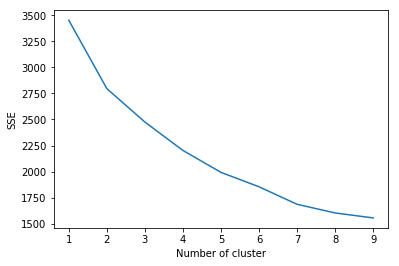

In [83]:
#Use elbow to understand clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(Clusters)
    Clusters["clusters"] = kmeans.labels_
    print(Clusters["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [84]:
Clusters

,probability_norm_y,sub_score_ratings_oo20,sub_score_listplacement_oo10,sub_score_growth_oo15,sub_score_topranks_oo15,category_Books,category_Business,category_Education,category_Entertainment,category_Finance,category_Food & Drink,category_Games,category_Health & Fitness,category_Lifestyle,category_Magazines & Newspapers,category_Medical,category_Music,category_Navigation,category_News,category_Photo & Video,category_Productivity,category_Reference,category_Social Networking,category_Sports,category_Travel,category_Utilities,category_Weather,clusters
48,0.341479,-1.030074,-0.113412,-1.047315,-0.539059,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7
73,0.748759,0.191175,0.480845,-0.309459,0.084514,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
84,1.665444,0.819548,0.124277,-0.925492,0.115416,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
88,0.294378,-1.221797,-0.231821,-0.850368,-0.063911,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7
110,-0.453443,0.731530,0.862892,-0.000365,-0.540446,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55510,0.637974,0.605038,-0.865040,-0.163190,-0.539050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7
55892,0.638637,0.401151,-0.445578,-0.302794,-0.433597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
56897,-0.519865,0.802909,-3.354101,0.779802,-0.540446,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6
57802,-0.457315,-0.628266,-1.266374,0.576866,-0.540446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6


In [85]:
# Unstructured clustering model to classify cluster

kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(Clusters[Clusters.columns[0:27]]) # Compute k-means clustering.
Clusters['score_cluster_label'] = kmeans.fit_predict(Clusters[Clusters.columns[0:27]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Clusters[Clusters.columns[0:27]]) # Labels of each point
print(Clusters)

app_scoring_top_perc = pd.merge(app_scoring_top_perc, Clusters['score_cluster_label'], right_index=True, left_index=True)

       probability_norm_y  sub_score_ratings_oo20  \
48               0.341479               -1.030074   
73               0.748759                0.191175   
84               1.665444                0.819548   
88               0.294378               -1.221797   
110             -0.453443                0.731530   
...                   ...                     ...   
55510            0.637974                0.605038   
55892            0.638637                0.401151   
56897           -0.519865                0.802909   
57802           -0.457315               -0.628266   
58017            1.005164               -1.877321   

       sub_score_listplacement_oo10  sub_score_growth_oo15  \
48                        -0.113412              -1.047315   
73                         0.480845              -0.309459   
84                         0.124277              -0.925492   
88                        -0.231821              -0.850368   
110                        0.862892              -0.0

In [89]:
#Send to CSV
app_scoring_top_perc.drop(['itunes_link','description','editor_notes'],axis=1).to_csv(r'/Users/justinpassek/Downloads/app_scoring.csv',index= False, header=True)